## Undegrad Dropout Prediction




Libraries


In [47]:
# loading the needed packages----
library(dplyr)
library(ggplot2)
library(readr)
library(rpart)
library(caret)
library(rpart.plot)
library(caTools)
library(party)
library(tidyr)
install.packages("ROSE")
library(ROSE)
library(e1071)
library(randomForest)


Warning message:
"package 'ROSE' is in use and will not be installed"

In [4]:
# data
undergrad_dropout <- read.csv("Downloads/undergrad_dropout.csv")


## Data Pre-Processing



In [5]:
# data changes----

### missing values----
colSums(is.na(undergrad_dropout))


X          gender  entrance_grade  final_hs_grade             age 
              0               0               0               0               0 
 economic_level   perc_absent_1   perc_absent_2 average_grade_1 average_grade_2 
              0               0               0               0               0 
library_usage_1 library_usage_2     scholarship   payment_delay   career_change 
              0               0               0               0               0 
        dropout 
              0


Changing the data types to categorical - factors


In [6]:
### changing data types----
undergrad_dropout$gender <- factor(undergrad_dropout$gender)
undergrad_dropout$economic_level <- factor(undergrad_dropout$economic_level)
undergrad_dropout$scholarship <- factor(undergrad_dropout$scholarship)
undergrad_dropout$payment_delay <- factor(undergrad_dropout$payment_delay)
undergrad_dropout$career_change <- factor(undergrad_dropout$career_change)
undergrad_dropout$dropout <- factor(undergrad_dropout$dropout)


In [7]:
glimpse(undergrad_dropout)



Observations: 908
Variables: 16
$ X               <int> 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17...
$ gender          <fct> Male, Male, Female, Male, Male, Male, Male, Male, F...
$ entrance_grade  <dbl> 35.18746, 33.15747, 29.00832, 37.94545, 38.89794, 2...
$ final_hs_grade  <dbl> 70.28119, 67.23621, 61.01248, 74.41818, 75.84691, 6...
$ age             <int> 18, 17, 17, 18, 18, 17, 17, 17, 20, 19, 17, 19, 19,...
$ economic_level  <fct> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, ...
$ perc_absent_1   <int> 7, 10, 3, 10, 11, 1, 2, 1, 5, 5, 4, 9, 9, 3, 9, 8, ...
$ perc_absent_2   <int> 8, 9, 5, 9, 3, 3, 11, 3, 5, 12, 5, 3, 4, 5, 4, 16, ...
$ average_grade_1 <int> 14, 14, 15, 13, 14, 15, 15, 15, 12, 13, 16, 13, 16,...
$ average_grade_2 <int> 11, 13, 14, 12, 13, 16, 12, 14, 13, 12, 11, 12, 12,...
$ library_usage_1 <int> 2, 2, 4, 1, 3, 5, 4, 4, 0, 1, 5, 1, 4, 4, 0, 0, 4, ...
$ library_usage_2 <int> 0, 1, 3, 1, 2, 6, 2, 3, 1, 0, 1, 1, 2, 3, 0, 0, 4, ...
$ scholarship     <f

## Dependant Variable


Dropout 


In [8]:
# response/dependant variable analysis----
dropout_count <- undergrad_dropout %>% 
  group_by(dropout) %>% 
   summarise(count=n())

dropout_count


dropout,count
0,657
1,251


The dataset is imbalanced.
Those not likely to dropout are more than those who are likely to drop out


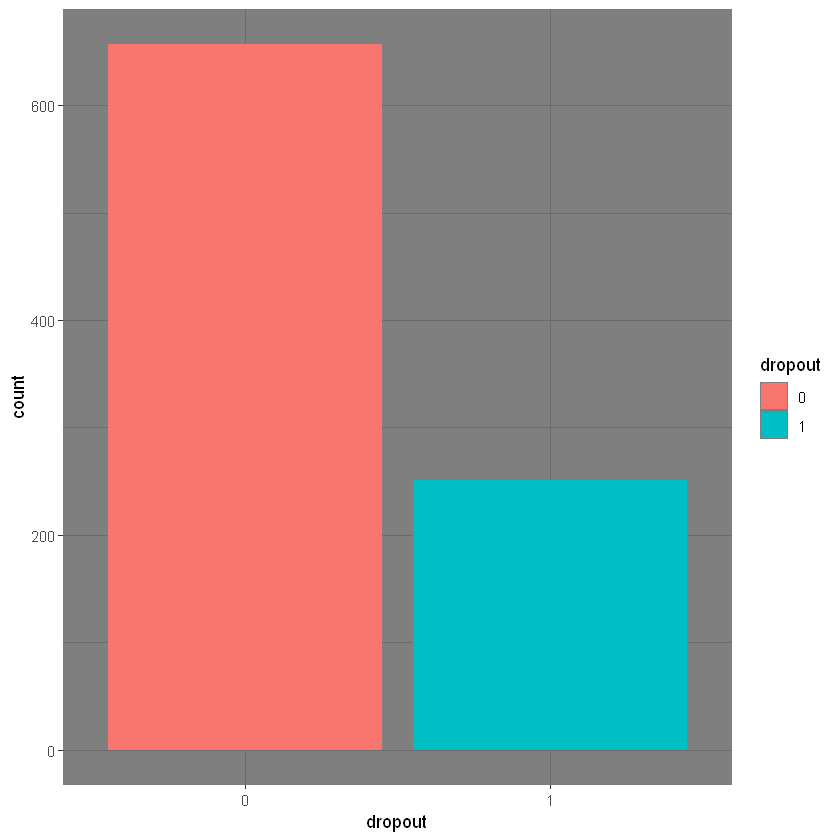

In [9]:
ggplot(dropout_count, aes(x=dropout, y=count, fill=dropout))+
  geom_col()+
  theme_dark()


Independent Variables


## Age


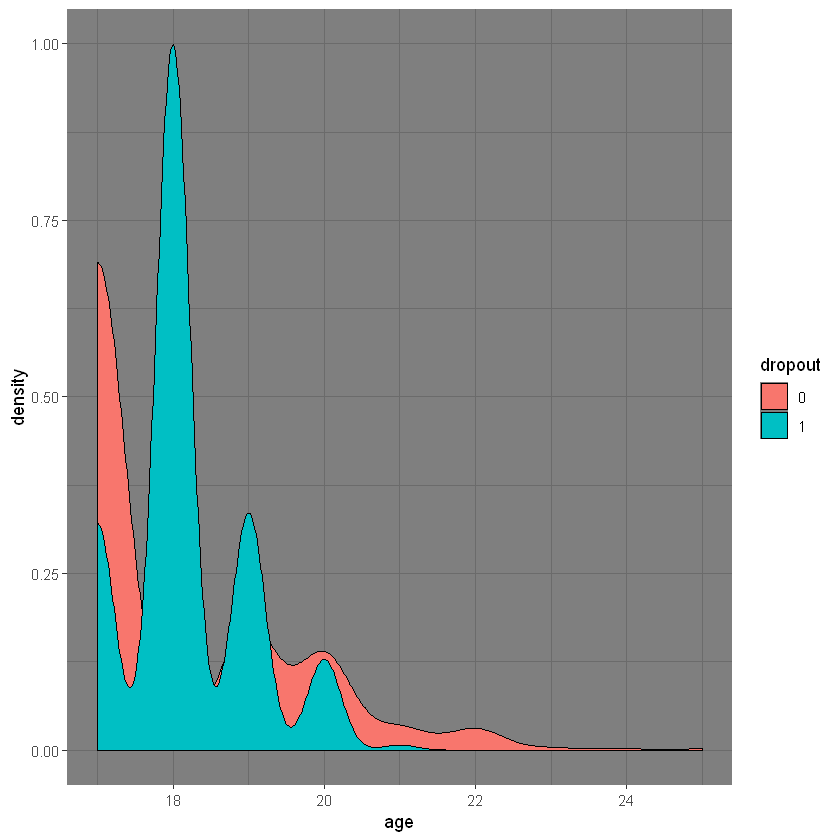

In [10]:
# predictor variable analysis----
### Age----


# visual
ggplot(undergrad_dropout, aes(x=age, fill=dropout))+
  geom_density()+
  theme_dark()


Students that are between 18 and 19 years old are the likliest to dropout. (middle age)
For students less than 18 years, and above 20 years, the majority are the ones who are not likely to dropout





## Gender


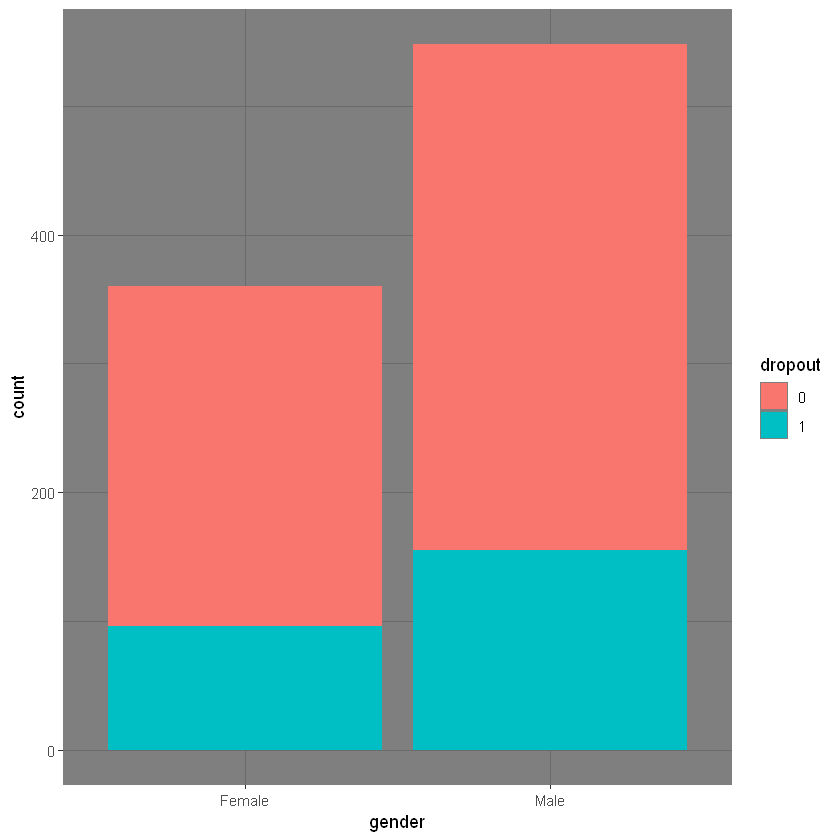

In [11]:
### Gender----


# visual
ggplot(undergrad_dropout, aes(x=gender, fill=dropout))+
  geom_bar(position = "stack")+
  theme_dark()


## Entrance Grade



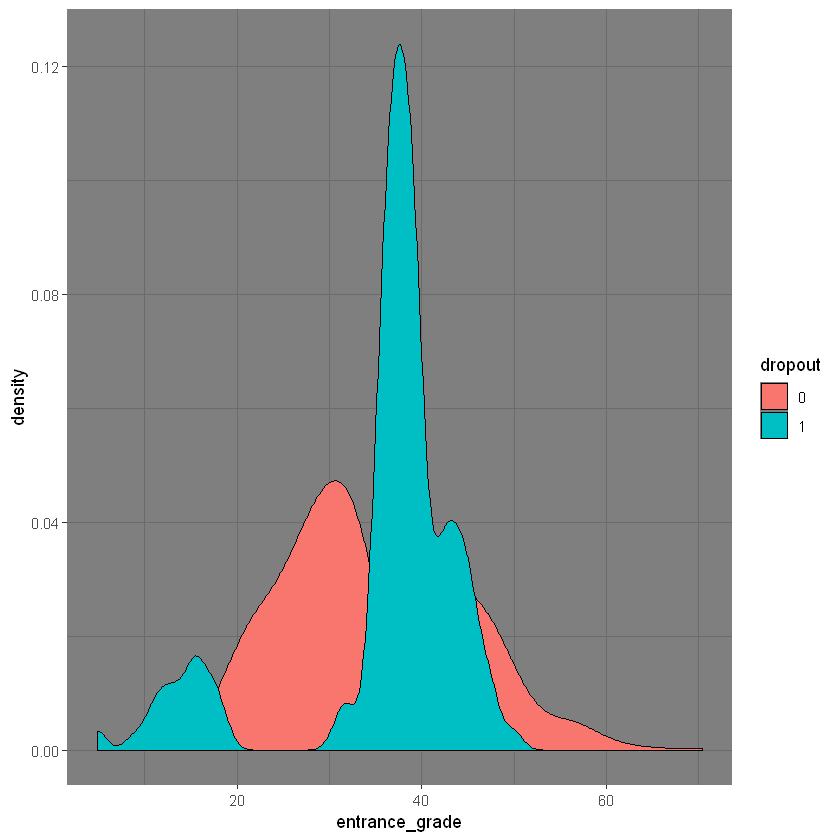

In [12]:
### entrance grade----
# visual
ggplot(undergrad_dropout, aes(x=entrance_grade, fill=dropout))+
  geom_density()+
  theme_dark()


Low entrance grades from students indicate a higher likelihood of dropping out



## Final high school grade


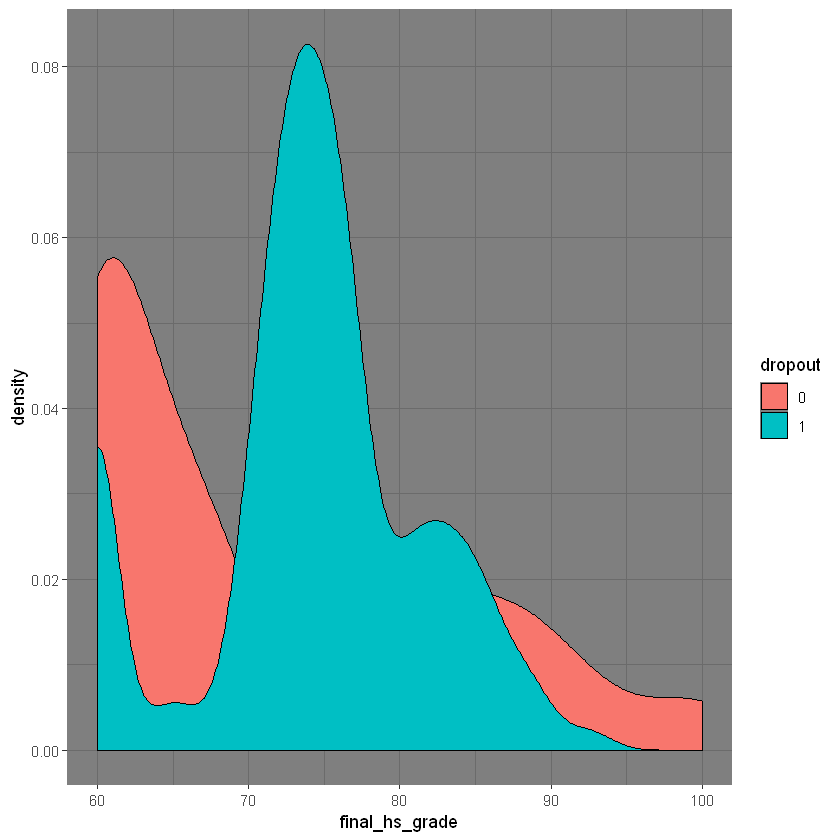

In [13]:
### final high school grade----


# visual
ggplot(undergrad_dropout, aes(x=final_hs_grade, fill=dropout))+
  geom_density()+
  theme_dark()


Low final high school grades from students indicate a higher likelihood of dropping out




## Economic Level


In [14]:
### economic level----

# descriptive
econ_dropout <- undergrad_dropout %>% 
                  group_by(economic_level) %>% 
                  filter(dropout == 1) %>% 
                   summarise(count=n())

econ_dropout


economic_level,count
1,8
2,26
3,42
4,175


Most students likely to dropout are in the lowest economic level category



In [15]:
econ_count <- undergrad_dropout %>% 
                  group_by(economic_level) %>% 
                  summarise(count=n())

econ_count


economic_level,count
1,53
2,98
3,131
4,626


The dropout rate ratios in each economic level



In [16]:
econ_dropout$total <- ""
econ_dropout$total <- econ_count$count
econ_dropout$ratio <- ""
econ_dropout$ratio <- round((econ_dropout$count/econ_dropout$total) * 100,2)

econ_dropout


economic_level,count,total,ratio
1,8,53,15.09
2,26,98,26.53
3,42,131,32.06
4,175,626,27.96


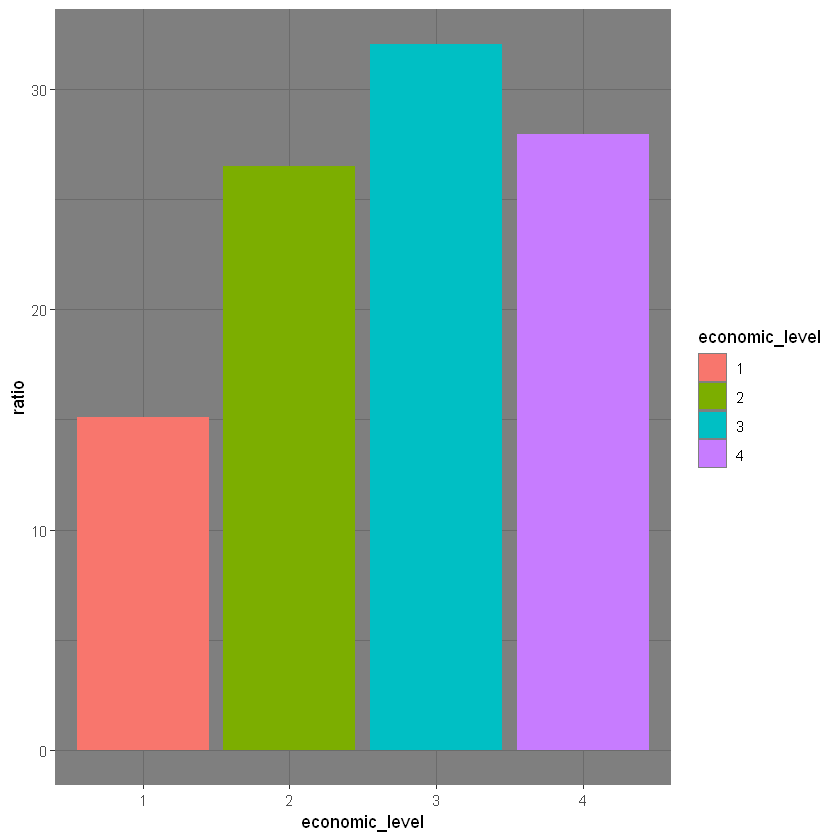

In [17]:
# visual
ggplot(econ_dropout, aes(x=economic_level, y=ratio, fill=economic_level))+
  geom_col()+
  theme_dark()
  


## Percent Absent


First semester


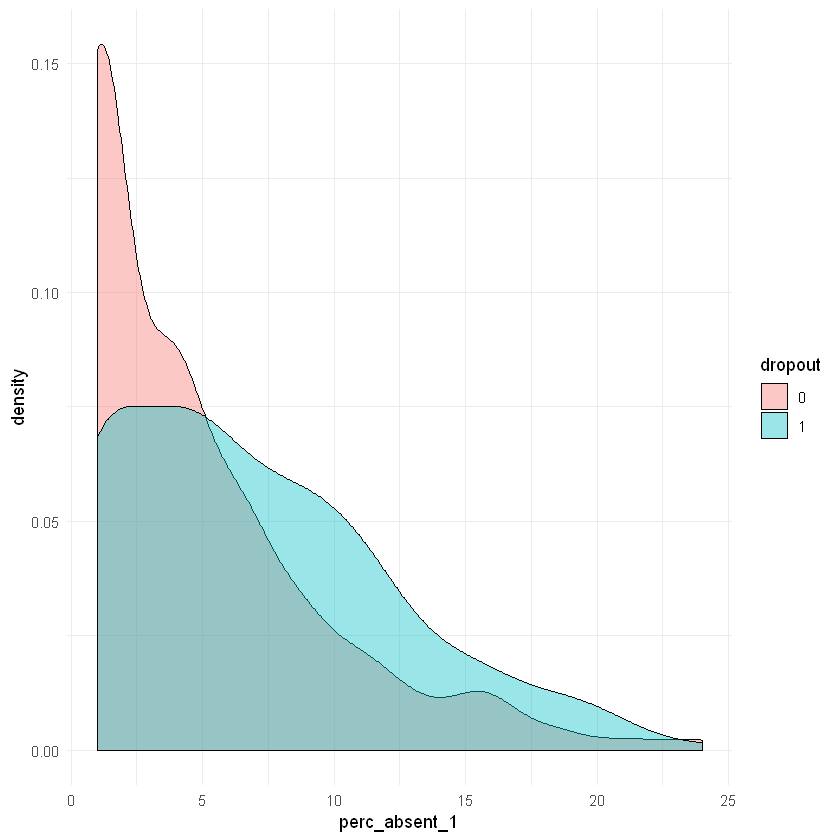

In [18]:
### percentage absent----

# (descriptive analysis)

#sem 1

# visual
ggplot(undergrad_dropout, aes(x=perc_absent_1, fill=dropout))+
  geom_density(alpha=0.4)+
  theme_minimal()


Second semester



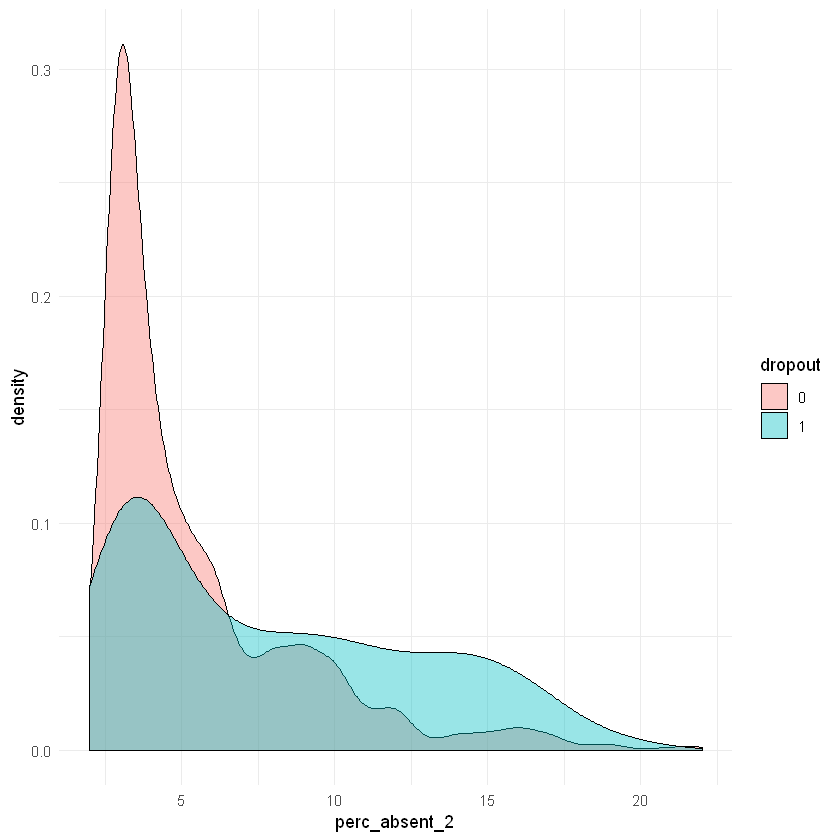

In [19]:
#sem 2

# visual
ggplot(undergrad_dropout, aes(x=perc_absent_2, fill=dropout))+
  geom_density(alpha=0.4)+
  theme_minimal()


Higher absence in class indicates a higher tendancy towards dropping out, in both semesters


## Average grade

First semester


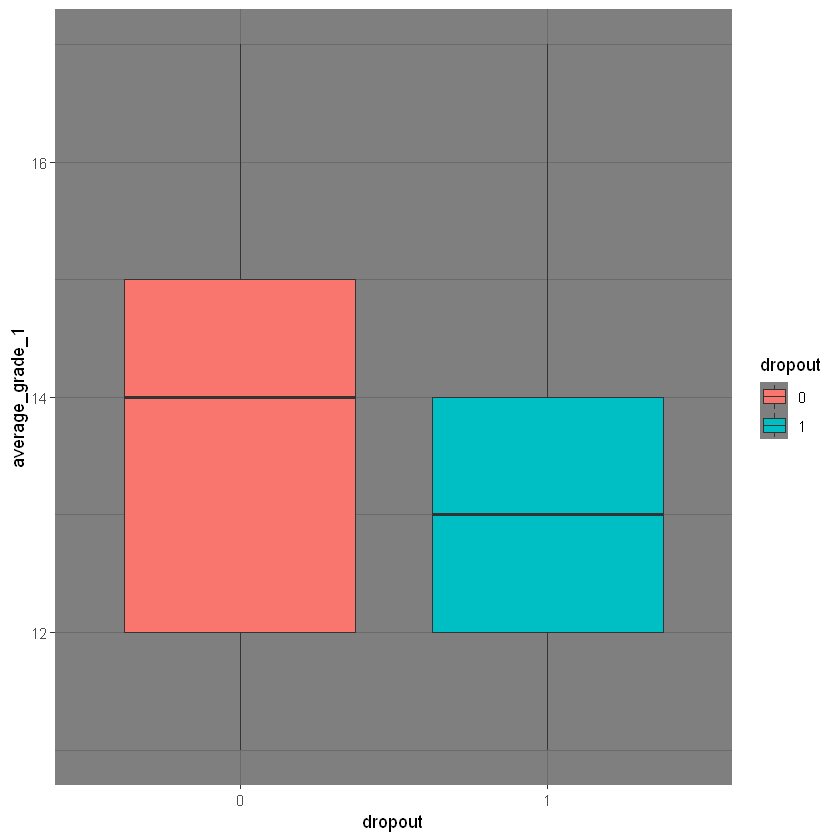

In [20]:
### average grade----

# sem 1

# visuals
ggplot(undergrad_dropout, aes(x=dropout, y=average_grade_1, fill=dropout))+
  geom_boxplot()+
  theme_dark()


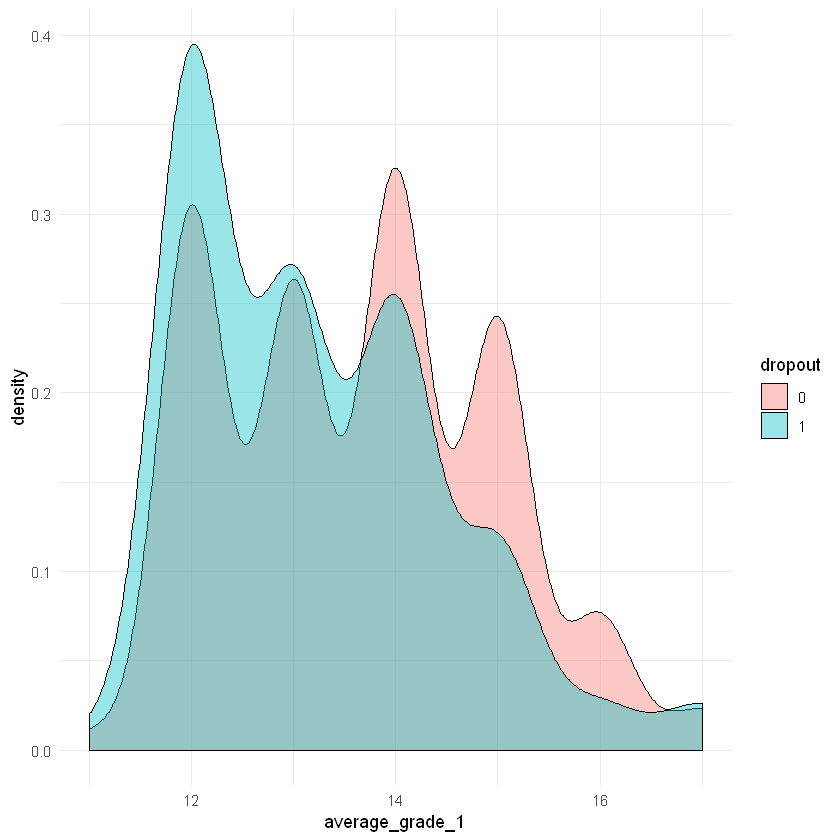

In [21]:
ggplot(undergrad_dropout, aes(x=average_grade_1, fill=dropout))+
  geom_density(alpha=0.4)+
  theme_minimal()


Dropout rates are higher amongst students with low grades, and rapidly decline as the grades rise


Second semester


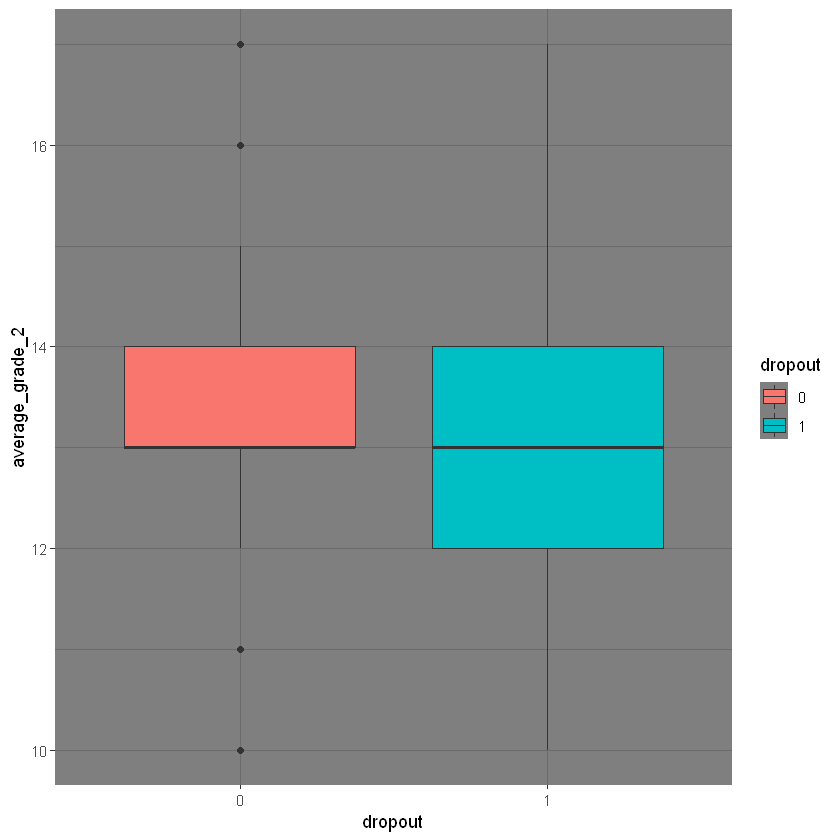

In [22]:
# sem 2

# visuals
ggplot(undergrad_dropout, aes(x=dropout, y=average_grade_2, fill=dropout))+
  geom_boxplot()+
  theme_dark()


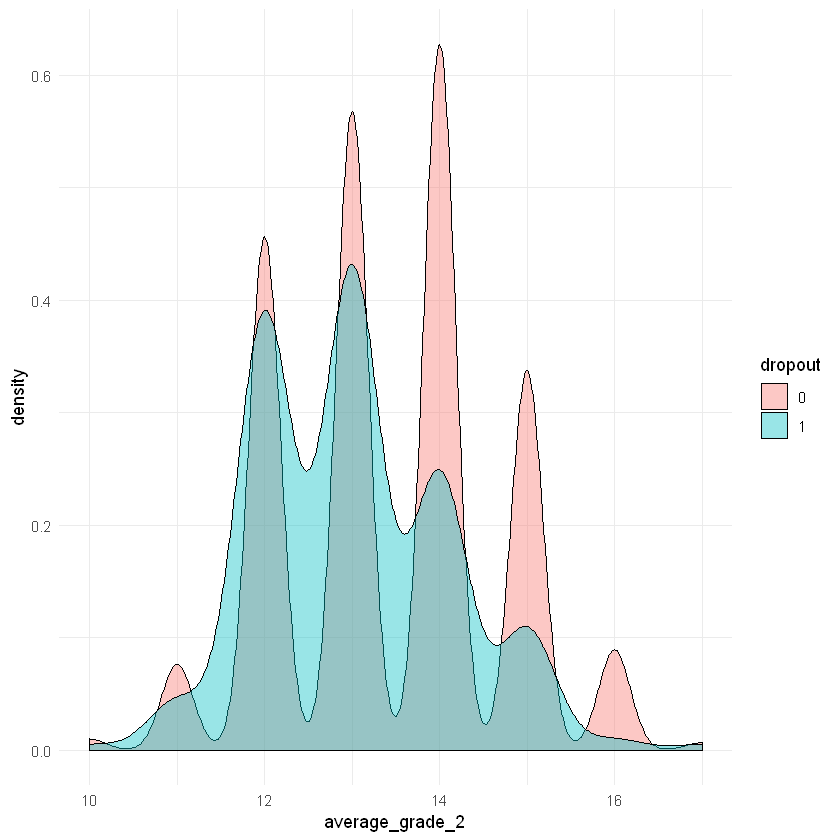

In [23]:
ggplot(undergrad_dropout, aes(x=average_grade_2, fill=dropout))+
  geom_density(alpha=0.4)+
  theme_minimal()


Grades are generally higher in the secon semester than the first, although, the students that are more likely to dropout are those with lower grades



## Library usage


First semester


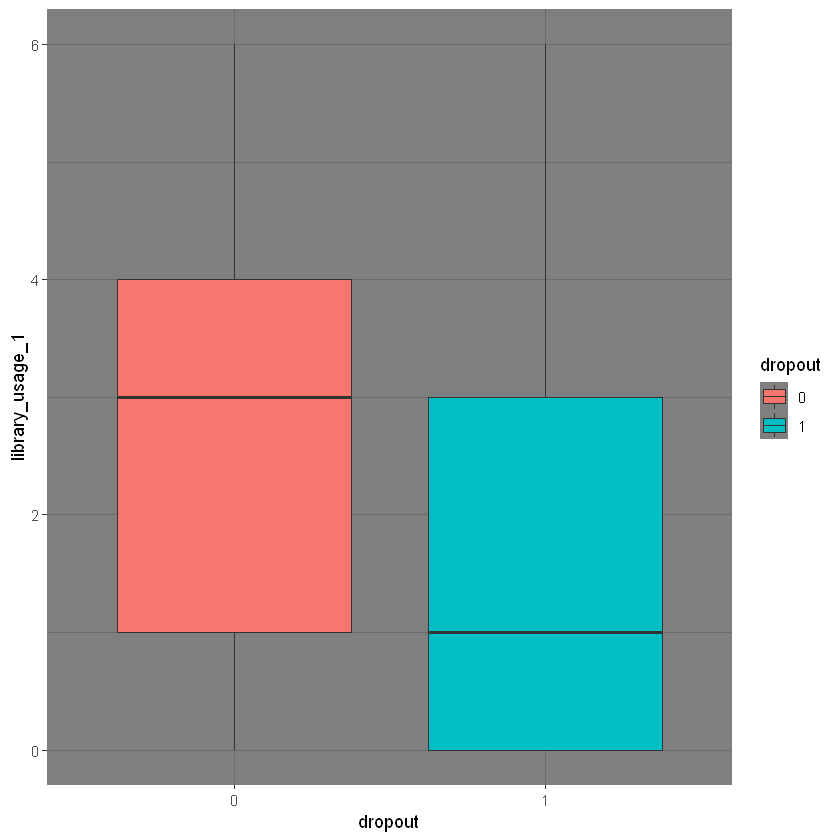

In [24]:
### library usage ----

#(descriptive analysis)

# sem 1

# visuals
ggplot(undergrad_dropout, aes(x=dropout, y=library_usage_1, fill=dropout))+
           geom_boxplot()+
           theme_dark()


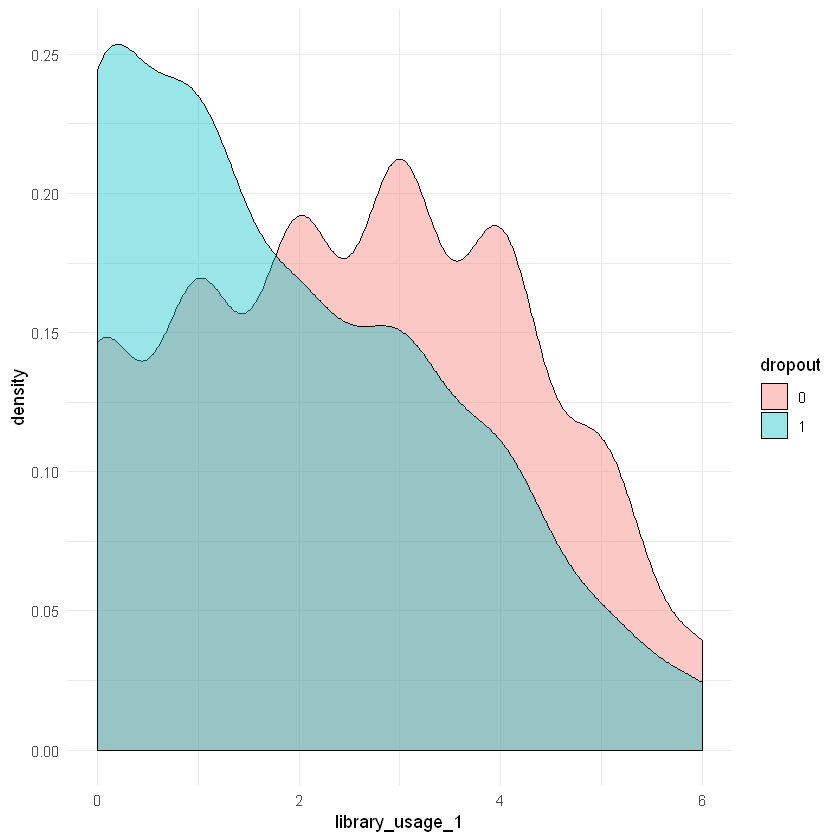

In [25]:
ggplot(undergrad_dropout, aes(x=library_usage_1, fill=dropout))+
  geom_density(alpha=0.4)+
  theme_minimal()


We observe a low usage rate of the library in the first semester from those likely to dropout



Second semester


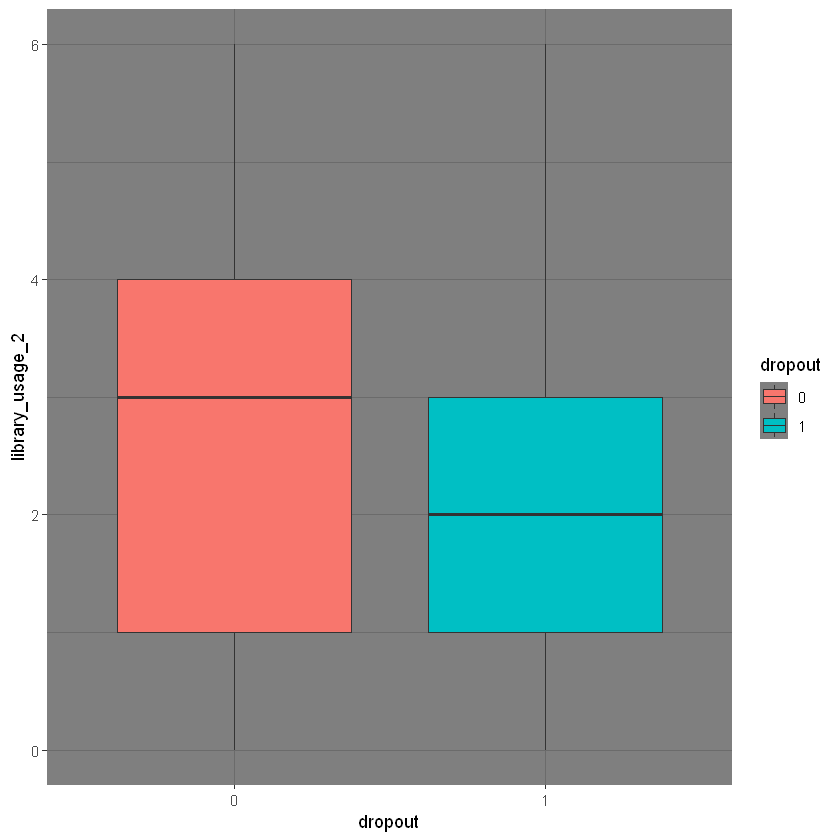

In [26]:
# sem 2

# visuals
ggplot(undergrad_dropout, aes(x=dropout, y=library_usage_2, fill=dropout))+
           geom_boxplot()+
           theme_dark()


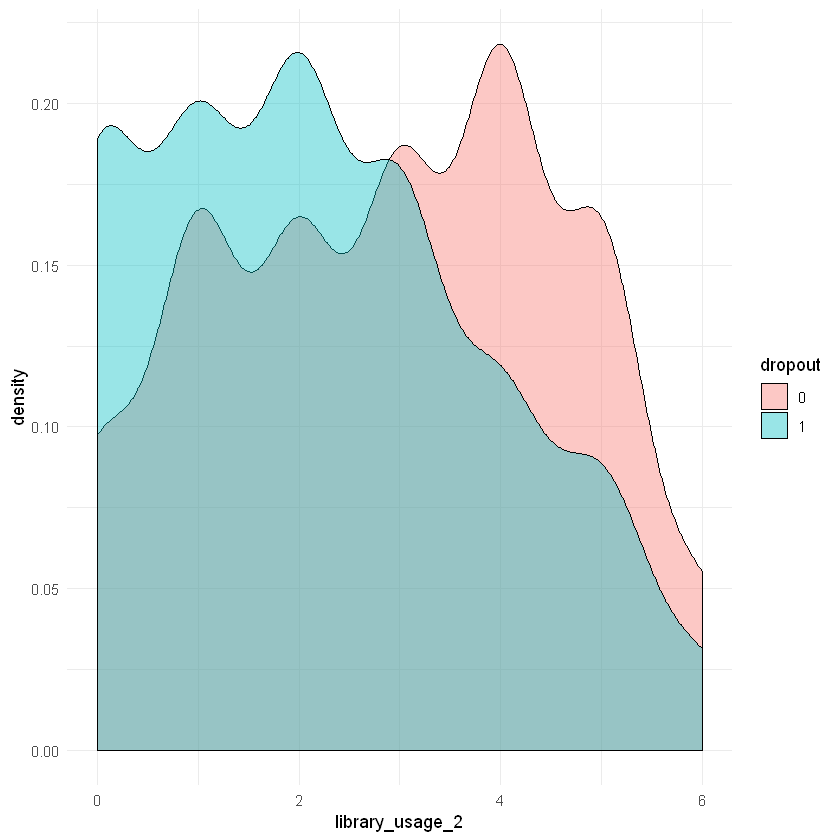

In [27]:
ggplot(undergrad_dropout, aes(x=library_usage_2, fill=dropout))+
  geom_density(alpha=0.4)+
  theme_minimal()

#(inferences)


Just as in the first semester, the students likely to dropout use less of the library than those who are unlikely to dropout


## Scholarship


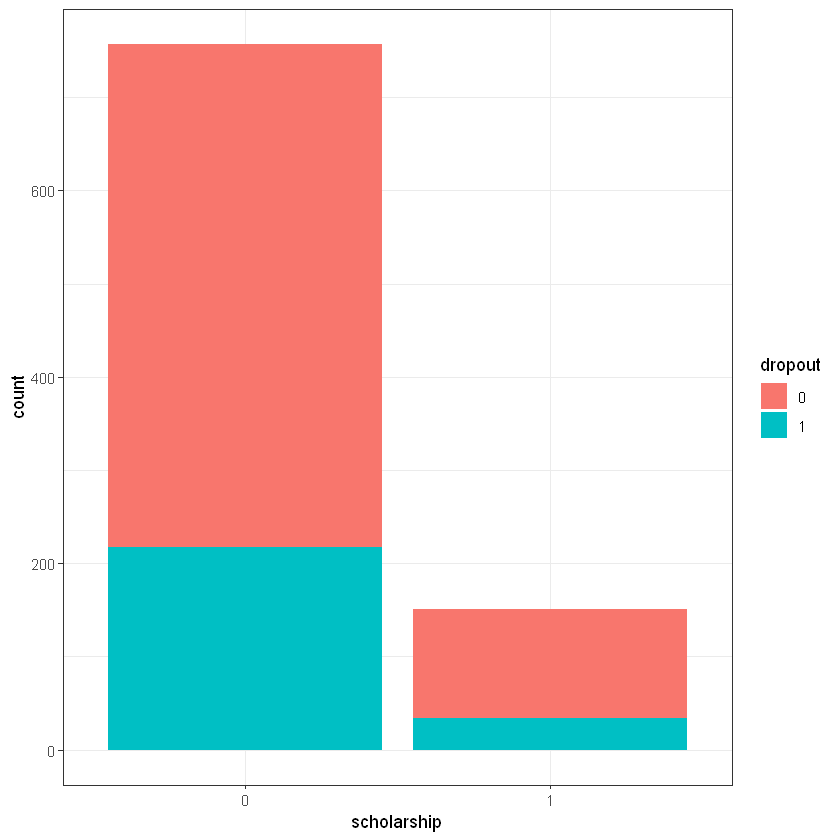

In [28]:
### scholarship ----


# visual
ggplot(undergrad_dropout, aes(x=scholarship, fill=dropout))+
  geom_bar(position = "stack")+
  theme_bw()


## Payment delay



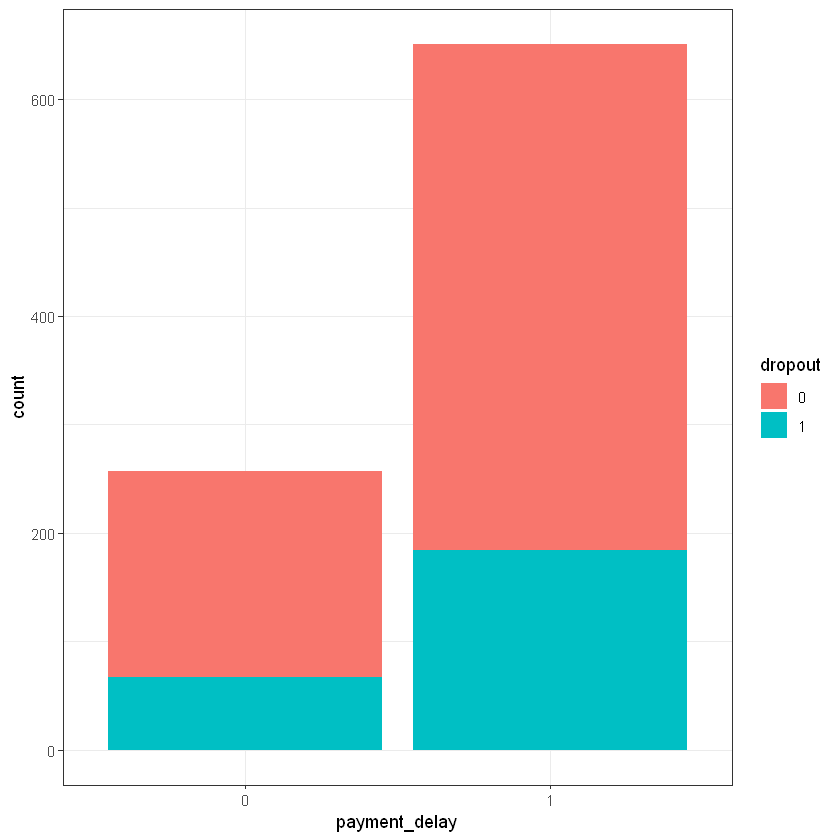

In [29]:
### payment delay ----


# visual
ggplot(undergrad_dropout, aes(x=payment_delay, fill=dropout))+
  geom_bar(position = "stack")+
  theme_bw()


## Career change



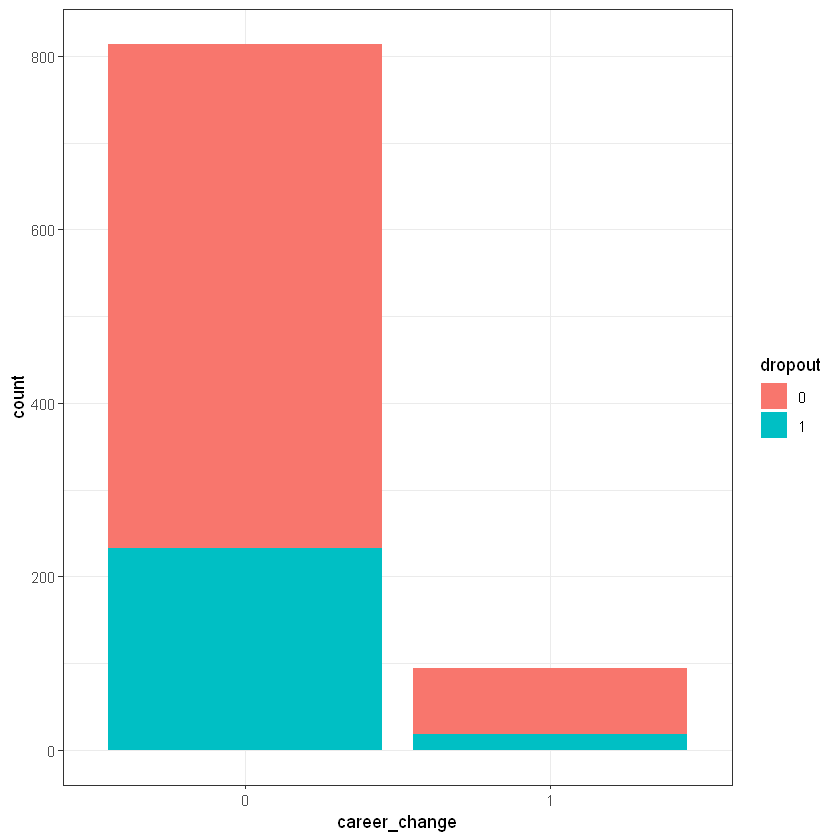

In [30]:
### career change----


# visual
ggplot(undergrad_dropout, aes(x=career_change, fill=dropout))+
  geom_bar(position = "stack")+
  theme_bw()


## Model Building


# Prepare the train data and test data


In [31]:
# model ----

# randomize
random <- sample(1:(nrow(undergrad_dropout)))
undergrad_dropout <- undergrad_dropout[random,]

# split
split <- c(1: (nrow(undergrad_dropout) * 0.7))

dropout_train <- undergrad_dropout[split,]
dropout_test <- undergrad_dropout[-split,]


## Logistic Model



In [32]:
### logistic----
glimpse(dropout_train)

# drop

dropout_train <- dropout_train[,-c(1,2,5,15)]

colnames(dropout_train)

# fit model
dropout_log_fit <- glm(dropout~., data = dropout_train, family = "binomial")
summary(dropout_log_fit)


Observations: 635
Variables: 16
$ X               <int> 443, 921, 358, 576, 80, 33, 721, 69, 355, 593, 622,...
$ gender          <fct> Male, Male, Female, Female, Male, Male, Female, Mal...
$ entrance_grade  <dbl> 45.06793, 40.68105, 45.31690, 34.37221, 50.22586, 4...
$ final_hs_grade  <dbl> 85.10189, 78.52158, 85.47535, 69.05832, 92.83880, 8...
$ age             <int> 20, 19, 20, 17, 21, 19, 17, 19, 22, 18, 18, 18, 17,...
$ economic_level  <fct> 4, 4, 3, 3, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 3, ...
$ perc_absent_1   <int> 1, 3, 1, 1, 2, 8, 15, 9, 7, 1, 4, 7, 6, 17, 10, 1, ...
$ perc_absent_2   <int> 9, 3, 3, 3, 3, 3, 11, 5, 4, 3, 11, 8, 15, 4, 3, 8, ...
$ average_grade_1 <int> 13, 15, 15, 13, 14, 13, 12, 12, 14, 17, 12, 14, 14,...
$ average_grade_2 <int> 15, 12, 15, 14, 14, 13, 12, 14, 12, 13, 13, 11, 14,...
$ library_usage_1 <int> 1, 4, 5, 3, 3, 3, 0, 1, 2, 6, 0, 2, 3, 4, 5, 2, 0, ...
$ library_usage_2 <int> 3, 3, 5, 4, 4, 1, 0, 4, 0, 4, 1, 0, 4, 1, 4, 2, 2, ...
$ scholarship     <f

[1] "entrance_grade"  "final_hs_grade"  "economic_level"  "perc_absent_1"  
 [5] "perc_absent_2"   "average_grade_1" "average_grade_2" "library_usage_1"
 [9] "library_usage_2" "scholarship"     "payment_delay"   "dropout"


Call:
glm(formula = dropout ~ ., family = "binomial", data = dropout_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0583  -0.7888  -0.5737   0.9509   2.4148  

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -8.66834    2.98537  -2.904 0.003689 ** 
entrance_grade  -0.10997    0.02975  -3.697 0.000219 ***
final_hs_grade   0.11939    0.02629   4.541  5.6e-06 ***
economic_level2  1.15652    0.58398   1.980 0.047657 *  
economic_level3  0.89414    0.57410   1.557 0.119362    
economic_level4  1.01494    0.52102   1.948 0.051415 .  
perc_absent_1    0.05419    0.02262   2.396 0.016570 *  
perc_absent_2    0.10570    0.02799   3.777 0.000159 ***
average_grade_1  0.29646    0.18383   1.613 0.106805    
average_grade_2 -0.21314    0.15352  -1.388 0.165019    
library_usage_1 -0.29050    0.17149  -1.694 0.090269 .  
library_usage_2  0.15572    0.13980   1.114 0.265326    
scholarship1

# Testing the model on the test data



In [33]:
# test on test data
dropout_test$predict_log <- ""
dropout_test$predict_log <- predict(dropout_log_fit, dropout_test, type = "response")

dropout_test$predict_log <- ifelse(dropout_test$predict_log >= 0.5, "Dropout", "No dropout")
dropout_test$dropout <- ifelse(dropout_test$dropout == 1, "Dropout", "No dropout")


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

Confusion matrix



In [34]:
table(dropout_test$dropout)




   Dropout No dropout 
        74        199 

In [35]:
xtabs(~dropout+predict_log, data = dropout_test)



            predict_log
dropout      Dropout No dropout
  Dropout         20         54
  No dropout      11        188

Due to the imbalanced data set the logistic model is highly biased, and therefore has poor predicting power



## Decision Tree


Fitting the model


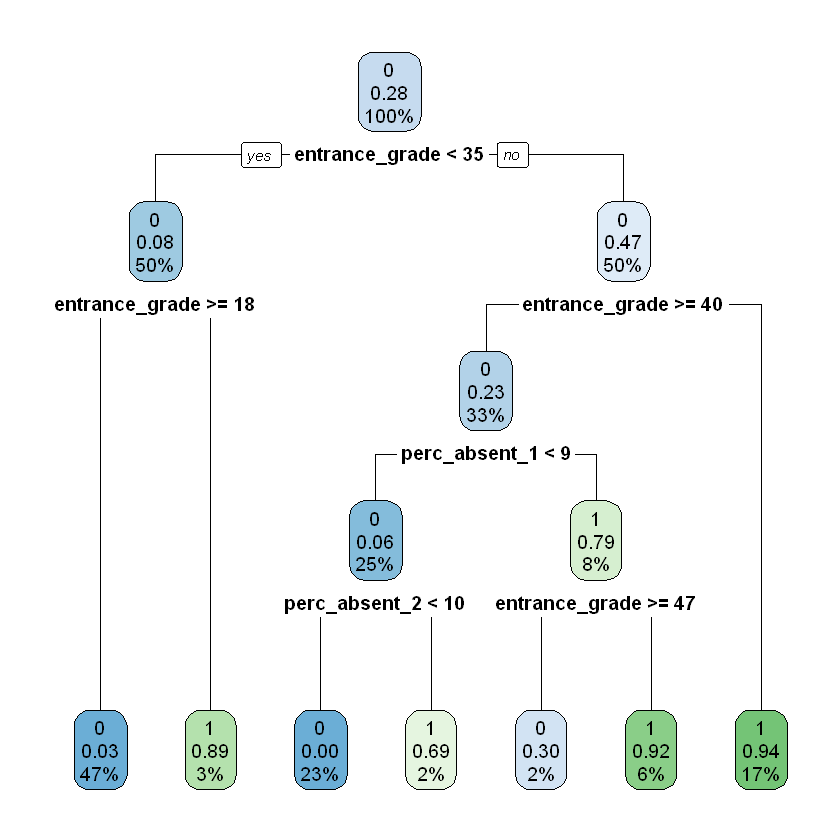

In [36]:
### decision tree ----
dropout_train_tree <- dropout_train

dropout_train$dropout <- factor(ifelse(dropout_train$dropout == 1, "Dropout", "No dropout"), levels = c("Dropout", "No dropout"))

dropout_fit <- rpart(dropout ~ . , method = "class", data = dropout_train_tree)

rpart.plot(dropout_fit)


Predictions on test data



In [37]:
dropout_test$predict_tree <- ""
dropout_test$predict_tree <- predict(dropout_fit, dropout_test, type = "class")

dropout_test$predict_tree <- ifelse(dropout_test$predict_tree == 1, "Dropout", "No dropout")


In [38]:
table(dropout_test$predict_tree)




   Dropout No dropout 
        68        205 

Confusion matrix



In [39]:
xtabs(~dropout+predict_tree, data = dropout_test)



            predict_tree
dropout      Dropout No dropout
  Dropout         64         10
  No dropout       4        195

The low bias property of the decision tree makes it able to predict the dropout rates with a high level of accuracy. Its variance is high however, and this could lead to overfitting.


Pruning the tree

Pre-prunning


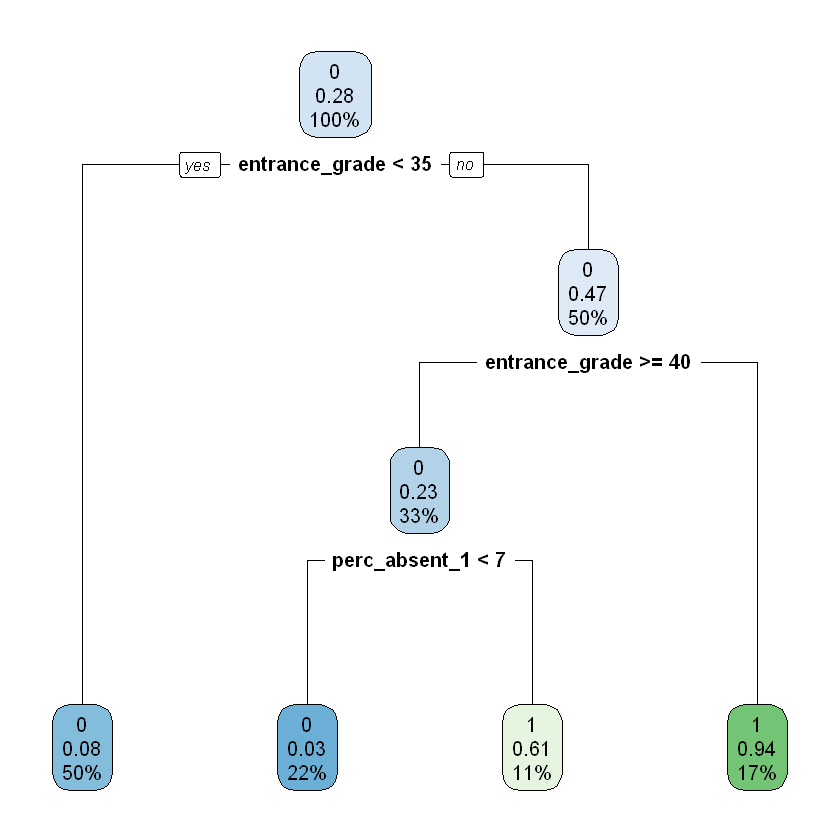

In [40]:
# prun the tree- reduce overfitting - pre prunning

dropout_fit_preprun <- rpart(dropout ~ . , method = "class", data = dropout_train_tree, control = rpart.control(cp = 0, maxdepth = 3, minsplit = 200))

rpart.plot(dropout_fit_preprun)


Predictions



In [41]:
dropout_test$predict_tree_prun <- ""
dropout_test$predict_tree_prun <- predict(dropout_fit_preprun, dropout_test, type = "class")

dropout_test$predict_tree_prun <- ifelse(dropout_test$predict_tree_prun == 1, "Dropout", "No dropout")


Confusion matrix



In [42]:
table(dropout_test$predict_tree_prun)
xtabs(~dropout+predict_tree_prun, data = dropout_test)



   Dropout No dropout 
        59        214 

            predict_tree_prun
dropout      Dropout No dropout
  Dropout         53         21
  No dropout       6        193

## Random Forest


Balancing the imbalanced data


In [49]:
dropout_train_for <- dropout_train

dropout_train_for %>% 
  group_by(dropout) %>% 
    summarise(count=n())

balanced_dropout <- ovun.sample(dropout ~ ., data = dropout_train_for, method = "over",N = 920)$data

table(balanced_dropout$dropout)


dropout,count
Dropout,177
No dropout,458



No dropout    Dropout 
       458        462 

Re-shuffling the observations and tuning the model 



mtry = 3  OOB error = 2.39% 
Searching left ...
mtry = 2 	OOB error = 2.61% 
-0.09090909 0.01 
Searching right ...
mtry = 4 	OOB error = 2.17% 
0.09090909 0.01 
mtry = 6 	OOB error = 2.17% 
0 0.01 
      mtry   OOBError
2.OOB    2 0.02608696
3.OOB    3 0.02391304
4.OOB    4 0.02173913
6.OOB    6 0.02173913
4.OOB 6.OOB 
    4     6 


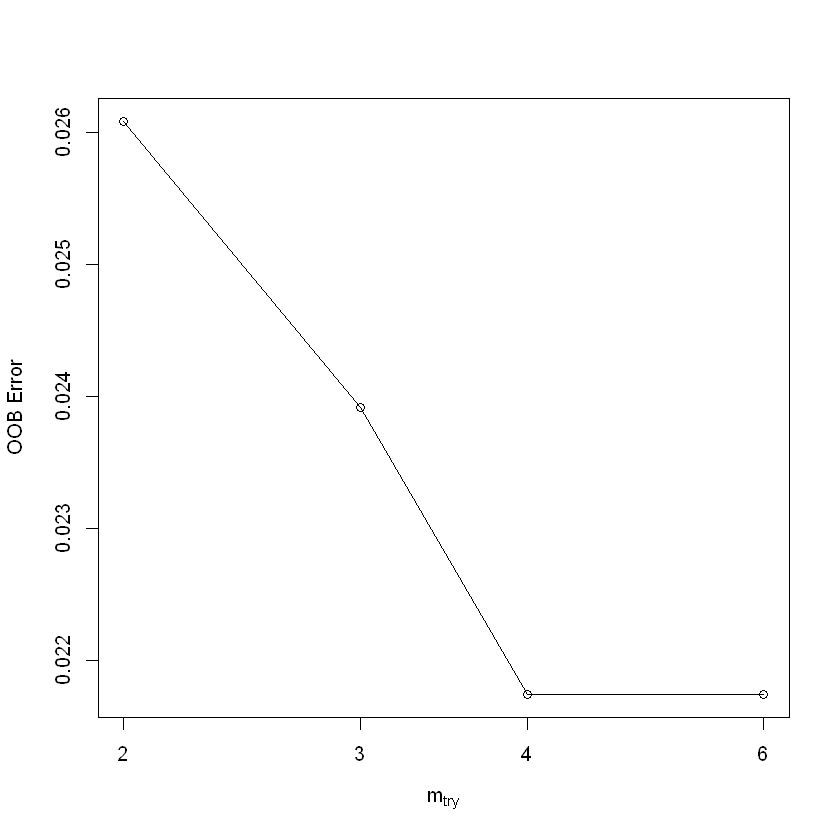

In [50]:
random <- sample(1:(nrow(balanced_dropout)))
balanced_dropout <- balanced_dropout[random,]

mtry <- tuneRF(balanced_dropout[-12],balanced_dropout$dropout, ntreeTry=1000,
               stepFactor=1.5,improve=0.01, trace=TRUE)


best.m <- mtry[mtry[, 2] == min(mtry[, 2]), 1]
print(mtry)
print(best.m)


Fitting the random forest



In [51]:
dropout_fit_for <- randomForest(dropout~., data = balanced_dropout, ntree = 1000, mtry = 4, importance = TRUE)

dropout_fit_for



Call:
 randomForest(formula = dropout ~ ., data = balanced_dropout,      ntree = 1000, mtry = 4, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 2.39%
Confusion matrix:
           No dropout Dropout class.error
No dropout        441      17  0.03711790
Dropout             5     457  0.01082251

Very high accuracy.
Extremely high sensitivity.



Testing the model on the original test data, observing the results


In [52]:
dropout_test$predict_for <- ""
dropout_test$predict_for <- predict(dropout_fit_for, dropout_test, type = "class")

xtabs(~dropout+predict_for, data = dropout_test)


            predict_for
dropout      No dropout Dropout
  Dropout             5      69
  No dropout        194       5